## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [4]:
df = pd.read_csv(r"C:\Users\lakshita\Desktop\datasets\liver_cirrhosis.csv")

In [5]:
df.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [6]:
df.tail()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
24995    3584      D  D-penicillamine  23612   F       N            N       N   
24996    3584      D  D-penicillamine  23612   F       N            N       N   
24997     971      D  D-penicillamine  16736   F       N            Y       Y   
24998    3707      C  D-penicillamine  16990   F       N            Y       N   
24999    3707      C  D-penicillamine  16990   F       N            Y       N   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
24995     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24996     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24997     Y        5.1   369.510563     3.23    18.0     790.0  179.80   
24998     N        0.8   315.000000     4.24    13.0    1637.0  170.50   
24999     N        0.8   315.000000     4.24    13.0    1637.0  170.50   

       Tryglicerides  Platelets  Prothrombin  Stage  
24995      96.000000      295.0         11.0      2  
24996      96.000000      295.0         11.0      2  
24997     124.702128      104.0         13.0      3  
24998      70.000000      426.0         10.9      2  
24999      70.000000      426.0         10.9      2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [8]:
df.describe()

N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean    1887.117040  18495.877080      3.402644    372.331471      3.486578   
std     1091.690918   3737.596616      4.707491    193.668452      0.380488   
min       41.000000   9598.000000      0.300000    120.000000      1.960000   
25%     1080.000000  15694.000000      0.800000    275.000000      3.290000   
50%     1680.000000  18499.000000      1.300000    369.510563      3.510000   
75%     2576.000000  20955.000000      3.400000    369.510563      3.750000   
max     4795.000000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  25000.000000  25000.000000  25000.000000   25000.000000  25000.000000   
mean     100.184663   1995.675597    123.166345     123.822548    256.007337   
std       73.184840   1798.885660     47.747616      52.786350     98.679006   
min        4.000000    289.000000     26.350000      33.000000     62.000000   
25%       52.000000   1032.000000     92.000000      92.000000    189.000000   
50%       97.648387   1828.000000    122.556346     124.702128    251.000000   
75%      107.000000   1982.655769    134.850000     127.000000    311.000000   
max      588.000000  13862.400000    457.250000     598.000000    721.000000   

        Prothrombin        Stage  
count  25000.000000  25000.00000  
mean      10.734549      2.00116  
std        0.904436      0.81387  
min        9.000000      1.00000  
25%       10.000000      1.00000  
50%       10.600000      2.00000  
75%       11.100000      3.00000  
max       18.000000      3.00000

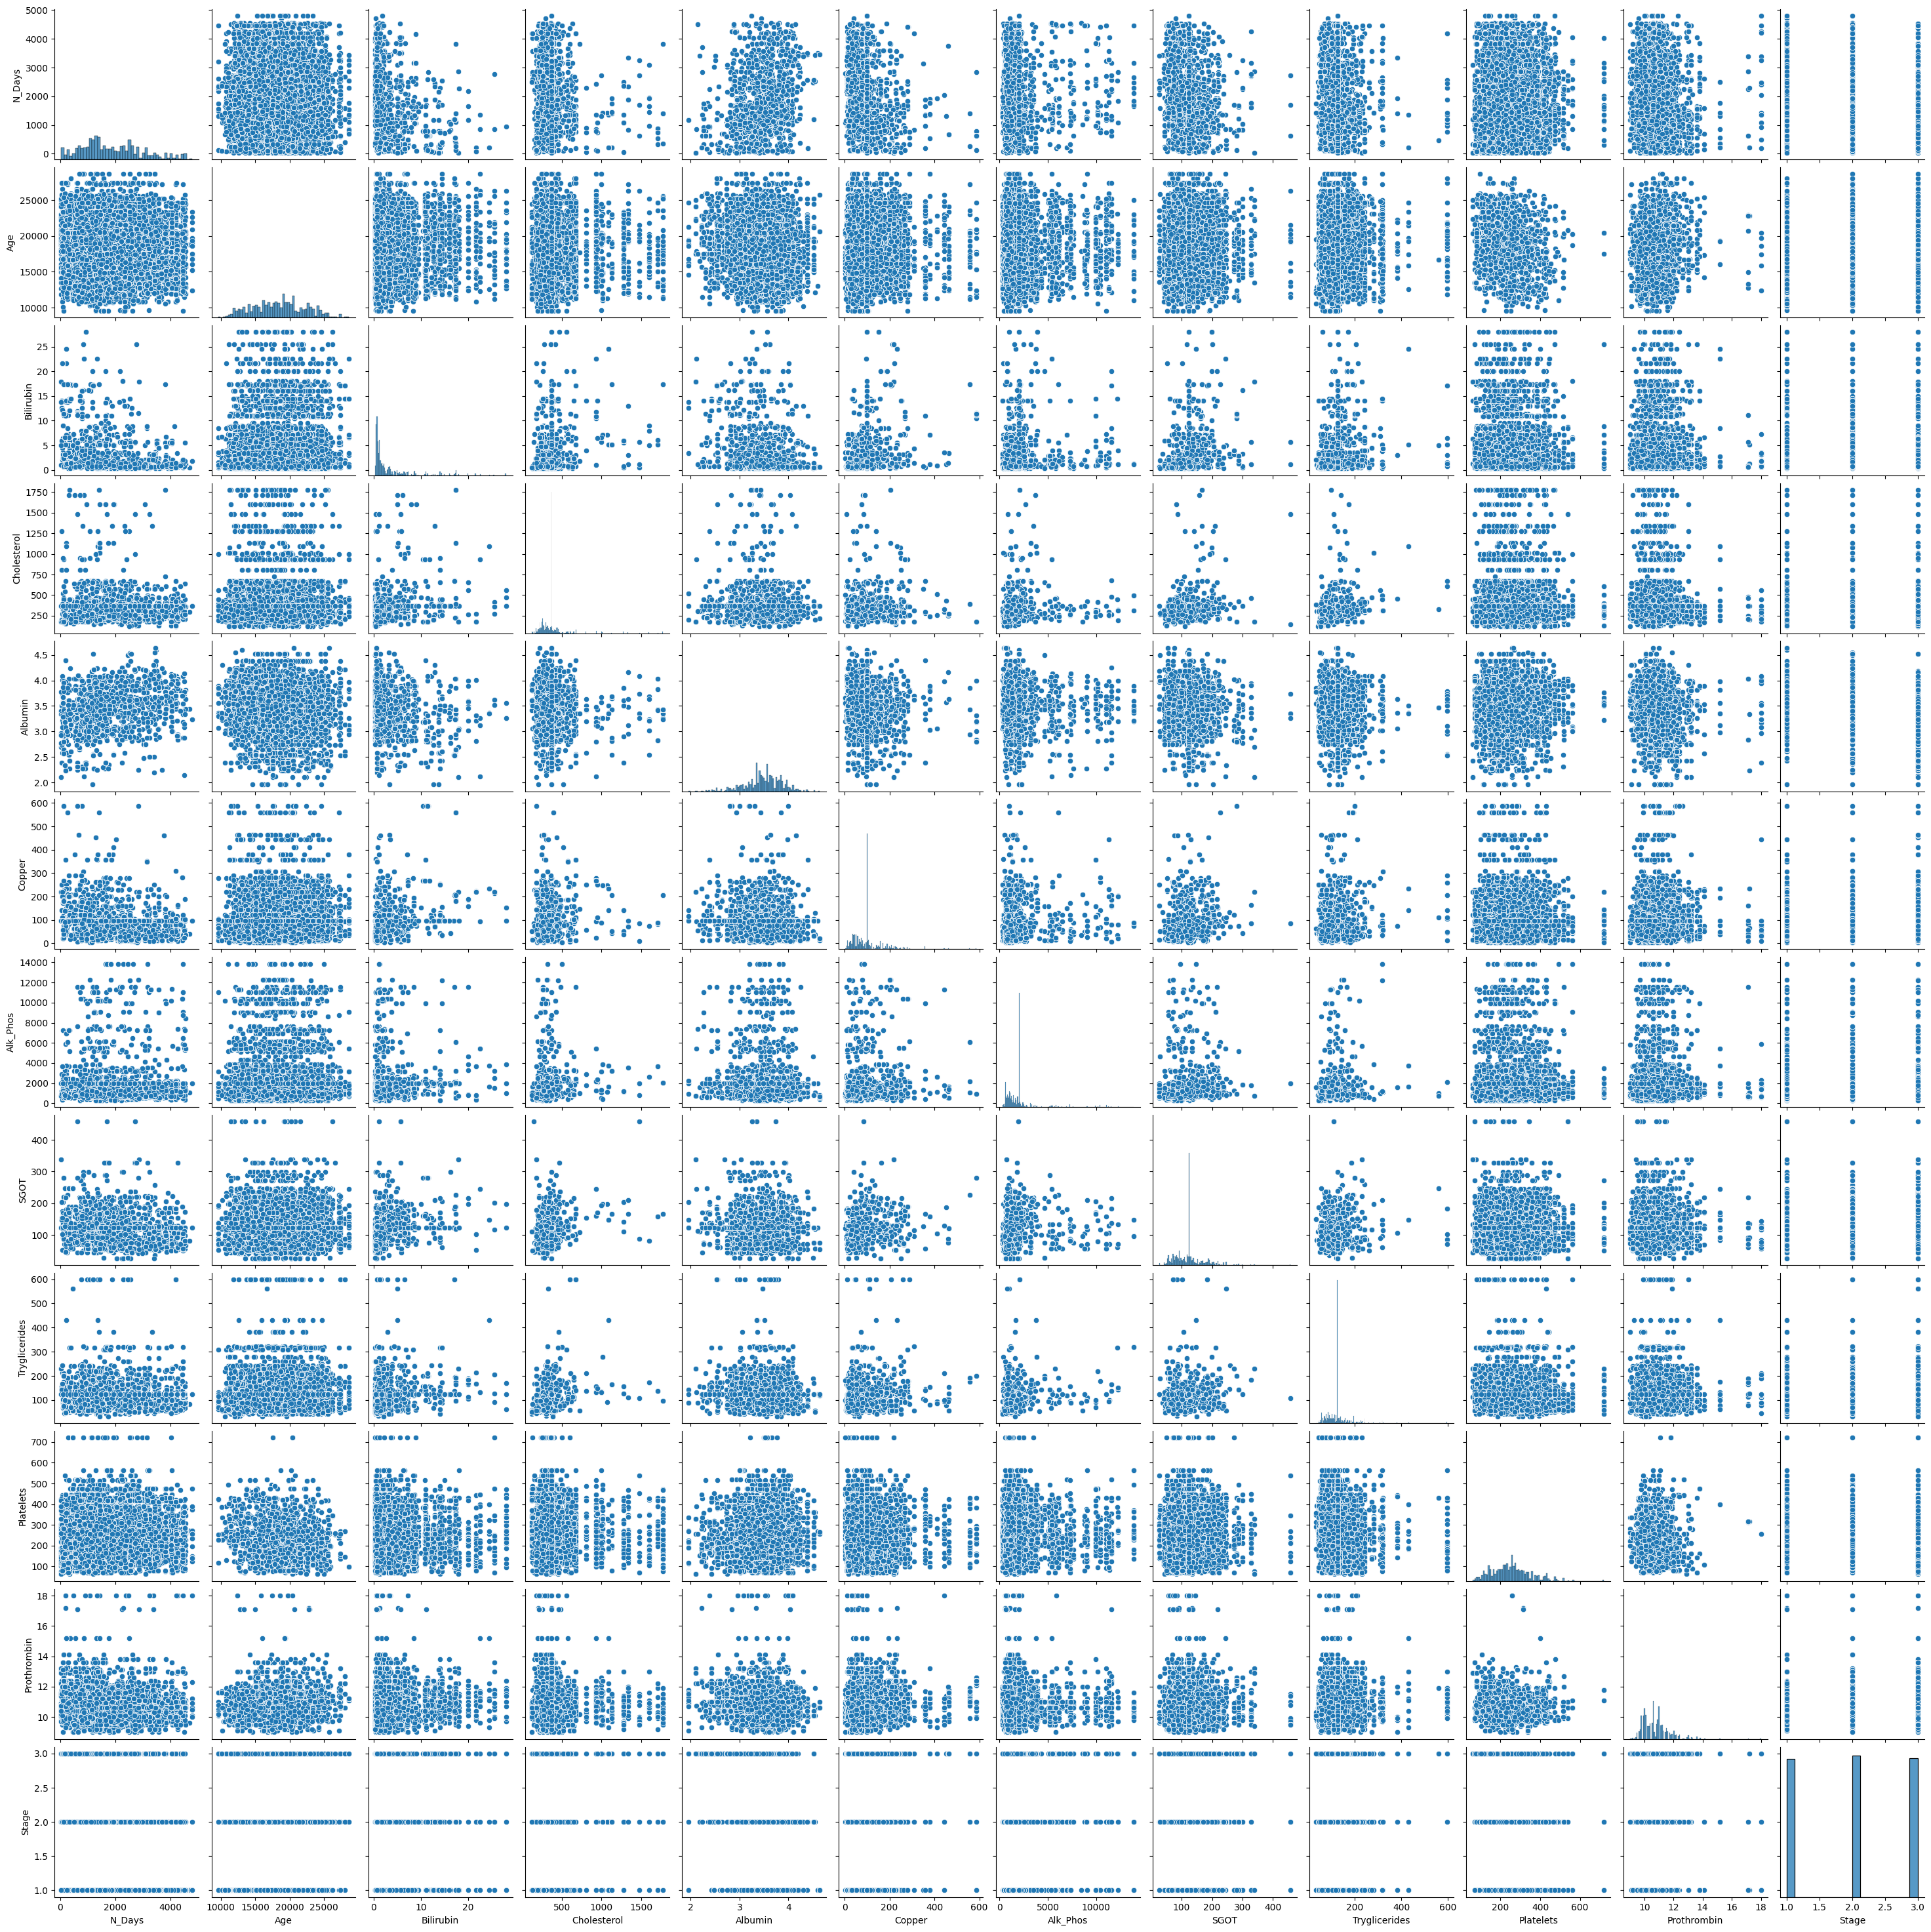

In [9]:
sns.pairplot(df)

## finding missing values

In [11]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

## converting stage to categorical

In [13]:
# Convert 'Stage' to categorical
df['Stage'] = df['Stage'].astype('category')

## Set theme

In [15]:
# Set theme
sns.set(style="whitegrid")

# Visualization 

## Numerical Features vs Stage

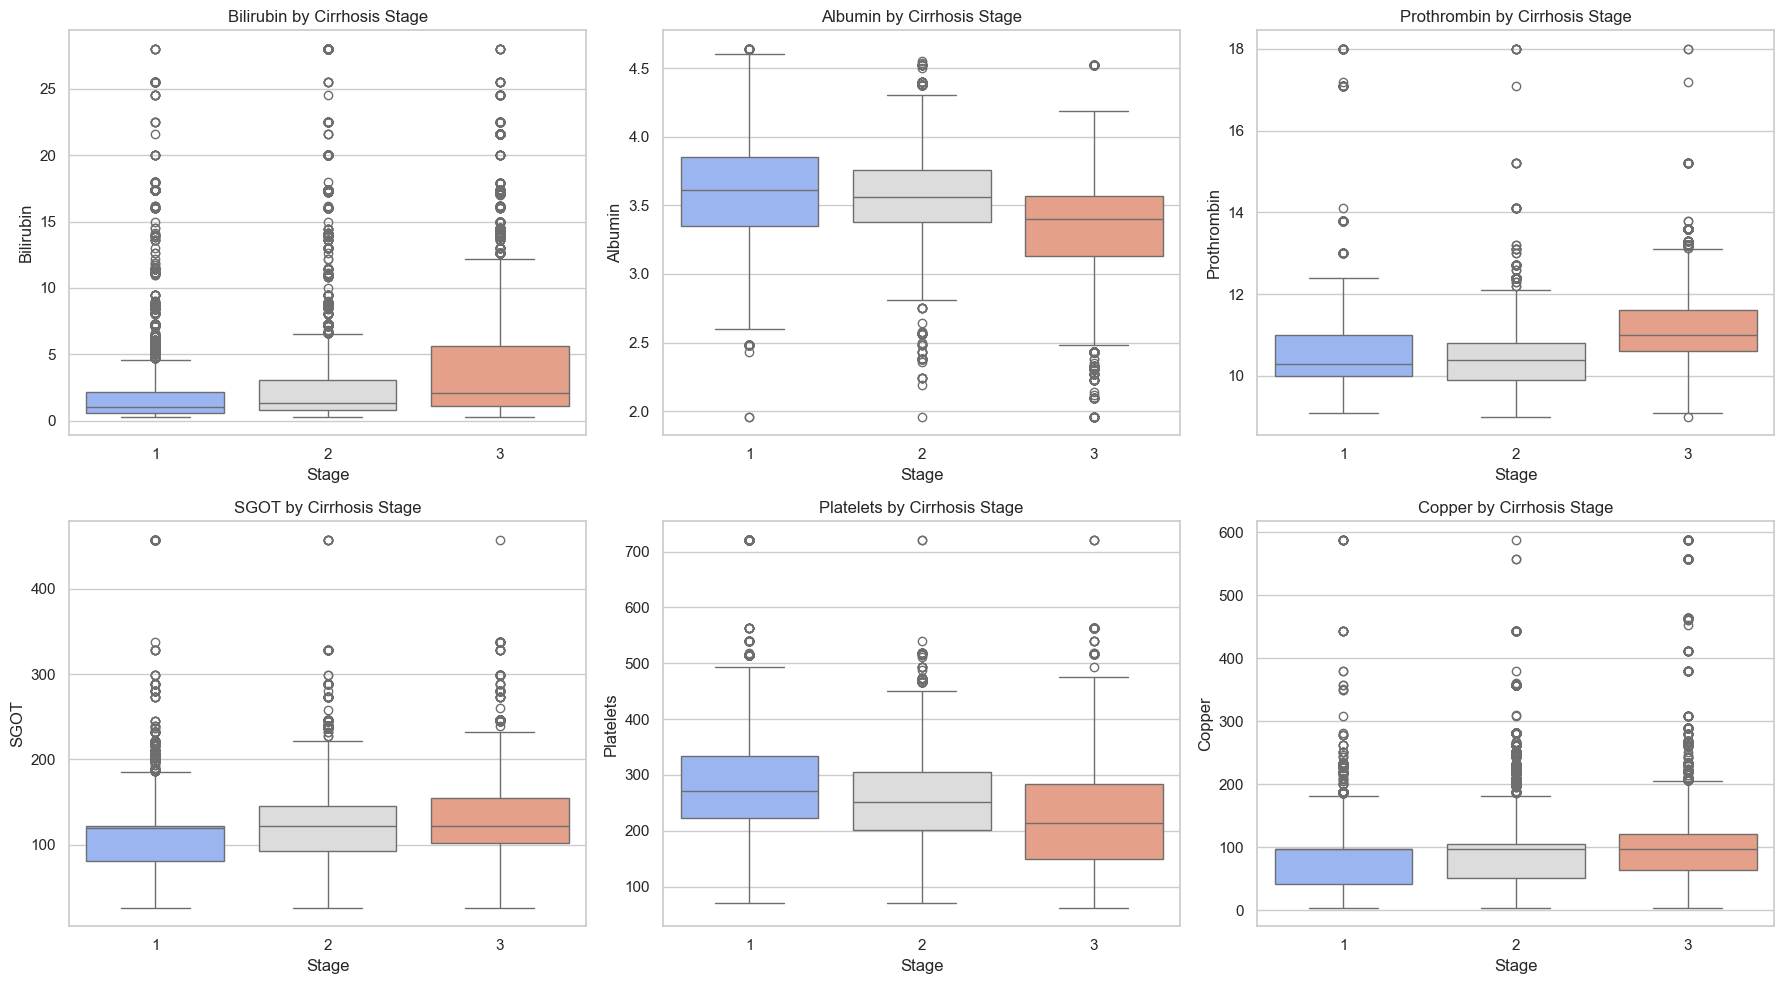

In [18]:
# Create subplots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot each feature
sns.boxplot(x='Stage', y='Bilirubin', data=df, ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title('Bilirubin by Cirrhosis Stage')

sns.boxplot(x='Stage', y='Albumin', data=df, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title('Albumin by Cirrhosis Stage')

sns.boxplot(x='Stage', y='Prothrombin', data=df, ax=axes[0, 2], palette="coolwarm")
axes[0, 2].set_title('Prothrombin by Cirrhosis Stage')

sns.boxplot(x='Stage', y='SGOT', data=df, ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title('SGOT by Cirrhosis Stage')

sns.boxplot(x='Stage', y='Platelets', data=df, ax=axes[1, 1], palette="coolwarm")
axes[1, 1].set_title('Platelets by Cirrhosis Stage')

sns.boxplot(x='Stage', y='Copper', data=df, ax=axes[1, 2], palette="coolwarm")
axes[1, 2].set_title('Copper by Cirrhosis Stage')

plt.tight_layout()
plt.show()

## Categorical Features vs Stage

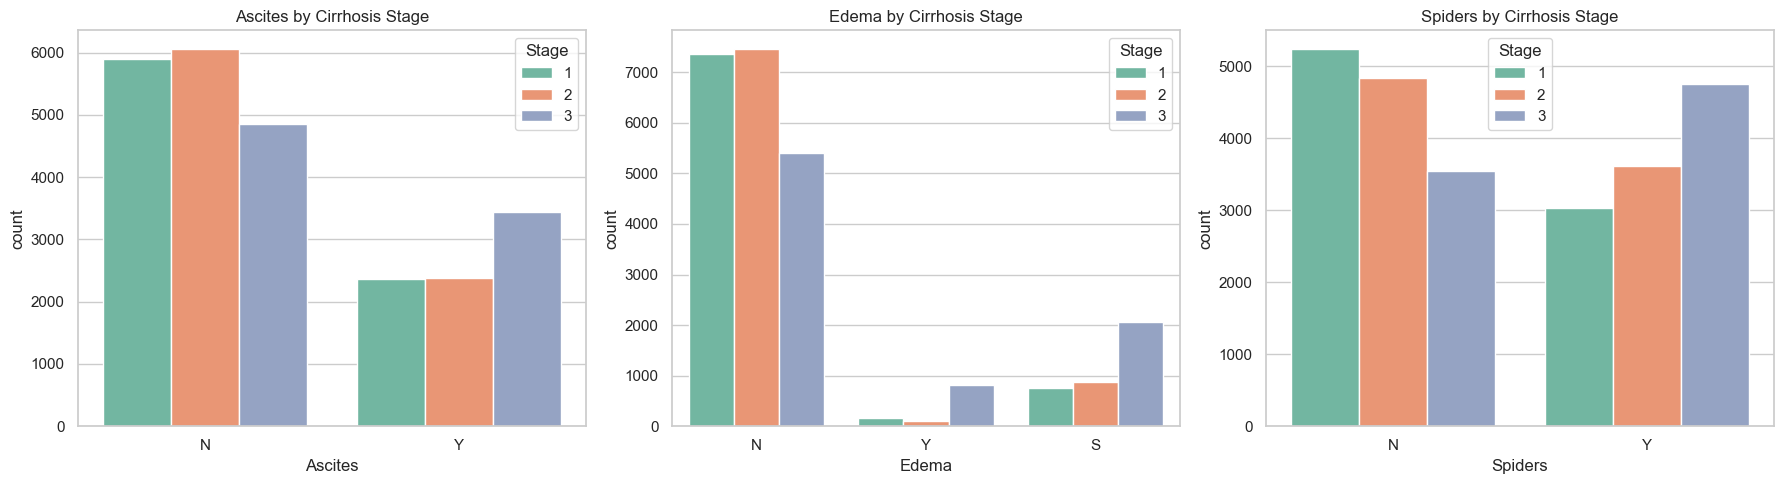

In [20]:
# Subplots for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Ascites', hue='Stage', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Ascites by Cirrhosis Stage')

sns.countplot(x='Edema', hue='Stage', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Edema by Cirrhosis Stage')

sns.countplot(x='Spiders', hue='Stage', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Spiders by Cirrhosis Stage')

plt.tight_layout()
plt.show()


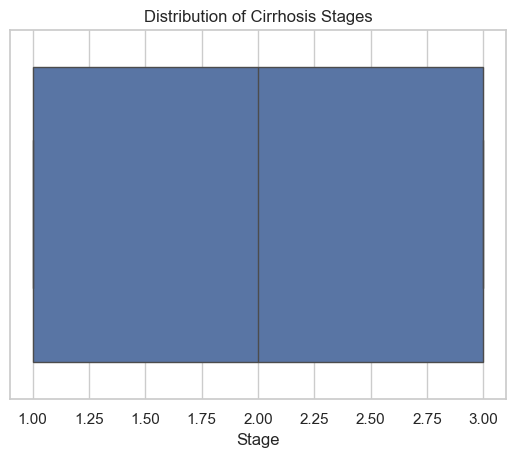

In [21]:
sns.boxplot(data=df, x='Stage')
plt.title("Distribution of Cirrhosis Stages")
plt.show()

## LabelEncoder

In [23]:
# Create a label encoder instance
le = LabelEncoder()

# List of categorical columns
categorical_cols = ['Sex', 'Ascites', 'Spiders', 'Edema']

# Apply LabelEncoder to each column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the changes
print(df[categorical_cols].head())


   Sex  Ascites  Spiders  Edema
0    0        0        0      0
1    1        1        1      0
2    0        0        0      0
3    0        0        0      0
4    0        0        0      0


## Correlation Matrix

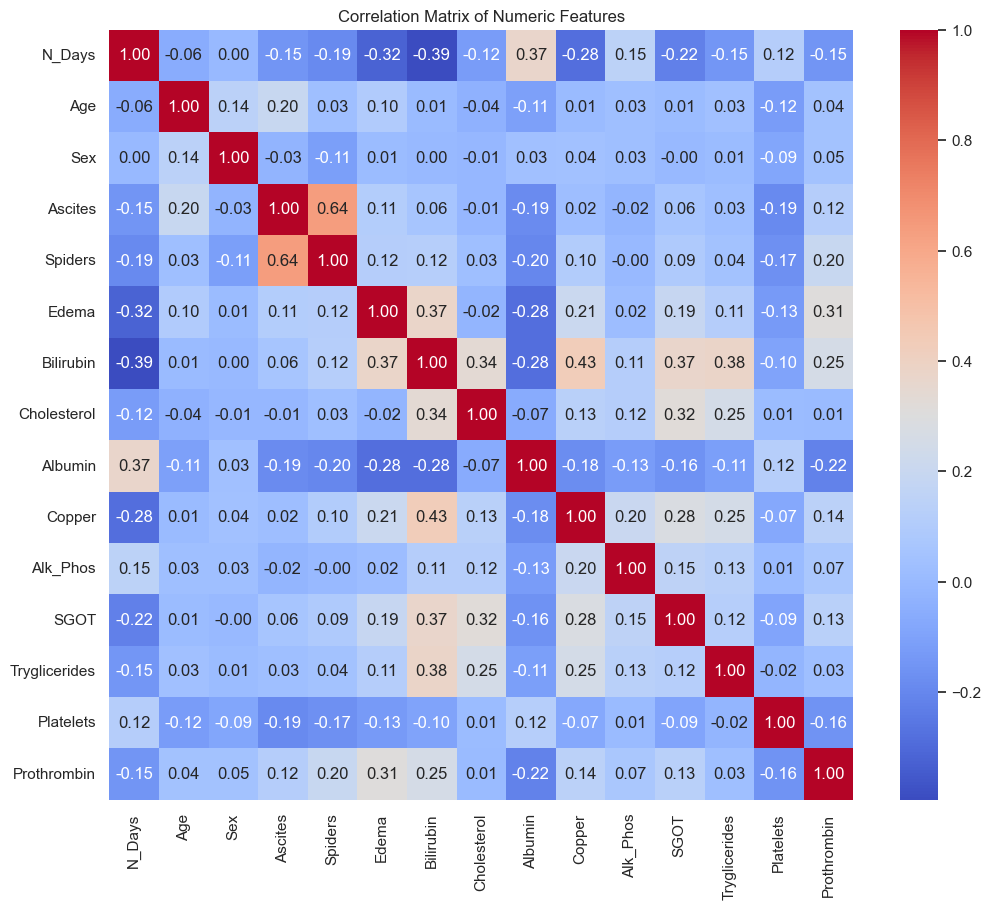

In [25]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


## Model Implementation

In [27]:
# Check unique values to decide mapping
print(df['Status'].unique())  # likely ['C', 'CL', 'D']
print(df['Drug'].unique())    # likely ['D-penicillamine', 'placebo']

# Encode these manually or using LabelEncoder
df['Status'] = df['Status'].map({'C': 0, 'CL': 1, 'D': 2})
df['Drug'] = df['Drug'].map({'placebo': 0, 'D-penicillamine': 1})

['C' 'D' 'CL']
['Placebo' 'D-penicillamine']


In [28]:
# Manual mapping for all remaining categorical columns
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['Ascites'] = df['Ascites'].map({'Y': 1, 'N': 0})
df['Spiders'] = df['Spiders'].map({'Y': 1, 'N': 0})
df['Edema'] = df['Edema'].map({'Y': 1, 'N': 0, 'S': 2})
df['Drug'] = df['Drug'].map({'D-penicillamine': 1, 'placebo': 0})
df['Status'] = df['Status'].map({'C': 0, 'CL': 1, 'D': 2})
df['Hepatomegaly'] = df['Hepatomegaly'].map({'Y': 1, 'N': 0})


In [29]:
# Step 2: Define features and target
X = df.drop(columns=['Stage'])   # Features (all except target)
y = df['Stage']                  # Target


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Random Forest Classifier

In [32]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred = model.predict(X_test)

In [58]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy: 0.9458

 Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.93      0.94      1653
           2       0.93      0.95      0.94      1688
           3       0.96      0.96      0.96      1659

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000


 Confusion Matrix:
 [[1534   82   37]
 [  64 1596   28]
 [  18   42 1599]]


In [78]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Data for plotting
x = ['Model Accuracy']
y = [acc]

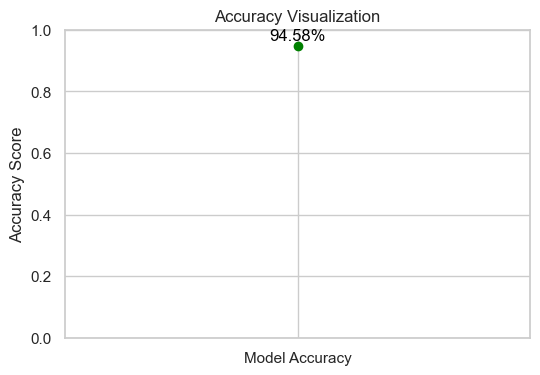

In [79]:
# Line plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o', color='green', linewidth=2)
plt.ylim(0, 1)
plt.title(f'Accuracy Visualization')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.text(x=0, y=acc+0.02, s=f"{acc:.2%}", ha='center', fontsize=12, color='black')
plt.show()

In [82]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

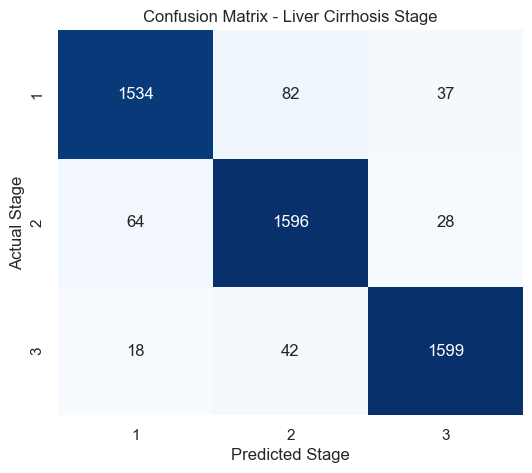

In [84]:
# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[1, 2, 3],
            yticklabels=[1, 2, 3])
plt.xlabel('Predicted Stage')
plt.ylabel('Actual Stage')
plt.title('Confusion Matrix - Liver Cirrhosis Stage')
plt.show()

In [85]:
# Get report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

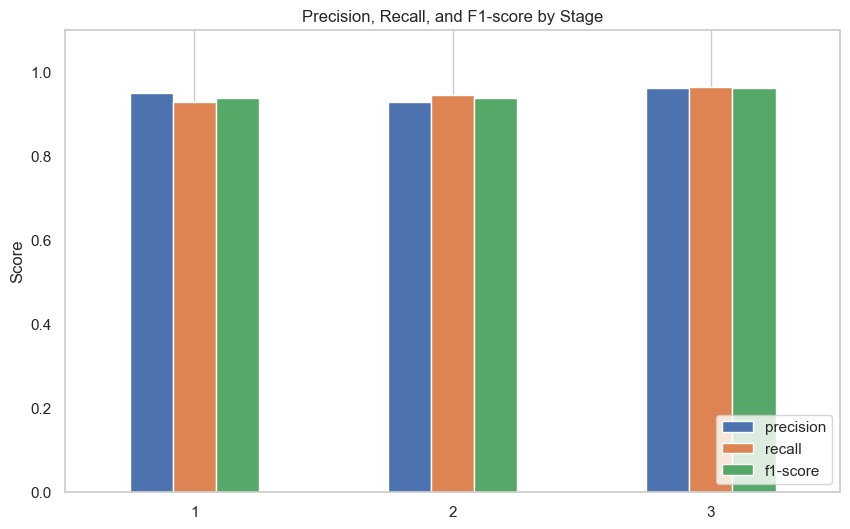

In [86]:
# Plot F1-score per class
df_report.iloc[:3][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-score by Stage')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()